<a href="https://colab.research.google.com/github/ichhitsapkota143/Machine-Learning/blob/main/Day34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Imputation**
Random imputation is a technique used in data preprocessing to handle missing values in a dataset. Instead of filling missing values with a fixed statistic like mean or median, random imputation replaces each missing value with a randomly selected value from the observed (non-missing) values of that variable. It can be used for both categorical and numerical values.

✅ Advantages:
  * Maintains the original distribution of the data.

  * More variability than constant imputation (e.g., mean or median).

⚠️ Disadvantages:
  * Introduces randomness—different runs may lead to different imputed datasets (unless a random seed is set).

  * Not suitable for small datasets or where randomness can strongly influence results.

  * May not preserve relationships with other variables (risk of bias).



In [20]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv('train (3).csv',usecols=['Age','Fare','Survived'])
df.sample(5)

,Survived,Age,Fare
890,0,32.0,7.7500
650,0,NaN,7.8958
749,0,31.0,7.7500
554,1,22.0,7.7750
373,0,22.0,135.6333


In [22]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [23]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [26]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [27]:
#gives only the null data
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

,Age_imputed
77,NaN
868,NaN
334,NaN
295,NaN
792,NaN
...,...
674,NaN
466,NaN
584,NaN
527,NaN


In [28]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([29. , 25. , 23. , 24. , 28. , 28. , 22. , 16. , 27. , 36. , 40. ,
        3. , 23. , 44. , 25. , 14.5, 27. , 26. , 60. , 24. , 20. , 28. ,
        2. , 36. ,  2. , 52. , 28.5, 30. , 71. , 37. , 58. , 30. , 64. ,
       42. , 21. , 24. , 24. ,  3. , 20. , 25. , 40. , 28. , 21. , 25. ,
       32. , 43. , 24. , 51. , 45. , 19. , 40. , 28. , 38. , 22. , 49. ,
       21. , 33. , 26. , 24. , 48. , 34. , 49. , 62. , 27. , 54. ,  4. ,
       31. , 47. , 48. , 34. , 22. , 17. ,  1. , 51. , 37. , 16. , 27. ,
       29. , 25. ,  2. , 14. , 21. , 40.5, 16. , 16. , 61. , 21. , 42. ,
       26. ,  3. , 42. ,  1. , 22. , 36. , 37. , 33. , 42. , 32. , 14. ,
       70. ,  4. , 38. , 45. , 19. , 40. , 50. , 22. , 39. , 56. , 25. ,
       35. , 24. , 20. , 36. , 41. , 39. ,  4. , 18. , 32. , 31. , 23. ,
       16. , 29. , 19. , 61. , 39. , 18. , 28. , 23. , 16. , 11. , 32. ,
       20. , 48. , 19. , 21. , 28. , 18. , 16. , 25. , 22. , 31. , 22. ,
       39. , 17. , 40. , 25. , 24. ])

In [29]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

<ipython-input-29-5ab996833007>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


In [30]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,24.0
493,71.0,49.5042,71.0
527,NaN,221.7792,28.0


<ipython-input-34-d31f8b0451bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original', hist=False)
<ipython-input-34-d31f8b0451bf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)


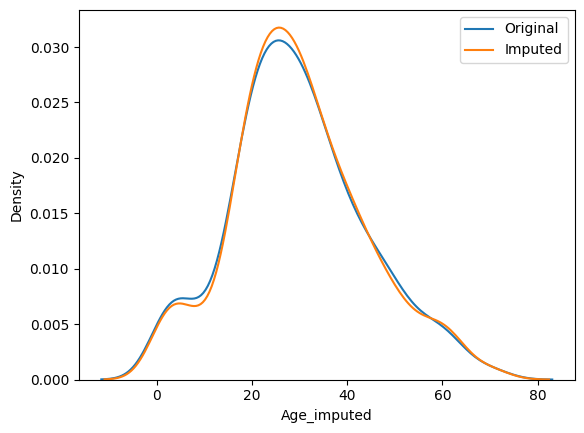

In [34]:
sns.distplot(X_train['Age'],label='Original', hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [36]:
print('Original variable variance:',X_train['Age'].var())
print('Original variable variance:',X_train['Age_imputed'].var())

Original variable variance: 204.3495133904614
Original variable variance: 199.97700227879704


In [37]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.669055
Age,71.512440,204.349513,204.349513
Age_imputed,53.669055,204.349513,199.977002


<Axes: >

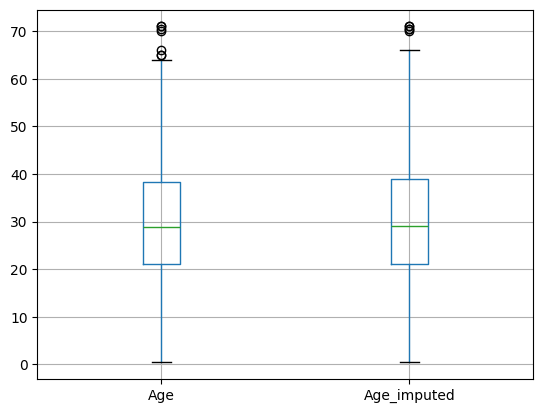

In [38]:
X_train[['Age','Age_imputed']].boxplot()

# ***Categorical Data***

In [42]:
data=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
data.sample(10)

,FireplaceQu,GarageQual,SalePrice
1189,TA,TA,189000
120,TA,TA,180000
534,Gd,TA,178000
847,Fa,TA,133500
739,NaN,TA,190000
1120,Gd,TA,118400
606,NaN,TA,152000
408,Gd,TA,280000
479,NaN,TA,89471
784,Gd,NaN,128000


In [43]:
data.isnull().sum()

,0
FireplaceQu,690
GarageQual,81
SalePrice,0


In [44]:
X=data
y=data['SalePrice']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']

X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [48]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
786,NaN,TA,139000,TA,NaN
1312,Ex,Gd,302000,Gd,Ex
279,TA,TA,192000,TA,TA
179,NaN,Fa,100000,Fa,NaN
133,NaN,TA,220000,TA,NaN


In [53]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-53-fb61a2e28ec0>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipytho

In [54]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,TA
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [57]:
temp=pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train['GarageQual_imputed'])

    ],axis=1
)

temp.columns=['original','imputed']
temp

,original,imputed
TA,0.951043,0.953767
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [58]:
temp=pd.concat(
    [
        X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts()/len(X_train['FireplaceQu_imputed'])

    ],axis=1
)

temp.columns=['original','imputed']
temp

,original,imputed
Gd,0.494272,0.490582
TA,0.412439,0.415240
Fa,0.040917,0.041952
Po,0.027823,0.026541
Ex,0.024550,0.025685


In [59]:
X_train['FireplaceQu'].dropna().unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

<ipython-input-69-dcca4de2f411>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
<ipython-input-69-dcca4de2f411>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']==ca

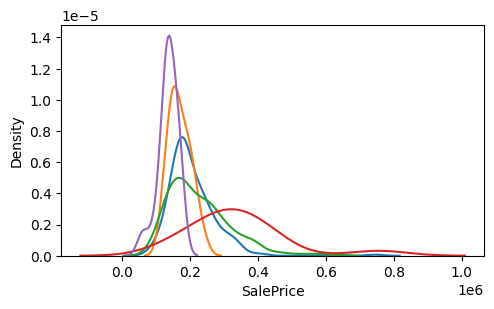

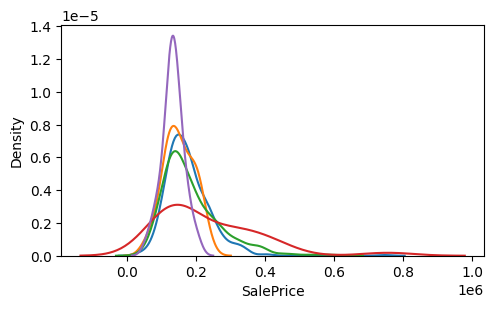

In [69]:
plt.figure(figsize=(12, 3))
plt.subplot(121)
for category in X_train['FireplaceQu'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
  #to see sales price for every category

plt.figure(figsize=(12, 3))
plt.subplot(122)
for category in X_train['FireplaceQu_imputed'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
  #to see sales price for every category
plt.show()

<ipython-input-64-ed19266f5263>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
<ipython-input-64-ed19266f5263>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Fireplace

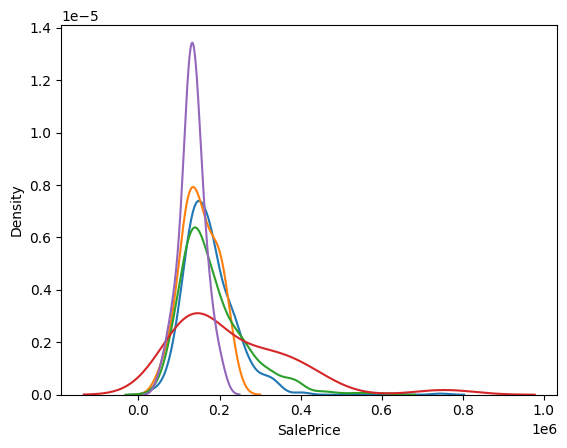